# 241 Project 

**Submitter: Sanchit Ram Arvind**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Question 1: Microcredit with State Changes

### 1.1

#### Question 1

$E_k$ would represent a Markov Chain for a single loan applicant,
as they move across different states of either being an applicant
or a beneficiary.

#### Question 2

We can define this like a Markov Chain:

1. Beneficiary pays back a loan in $k$ => Their loan is 
auto-renewed => They are a beneficiary again in $k+1$
2. Beneficiary defaults in $k$ => Their loan is not auto-renewed
=> They are an applicant in $k+1$

The above two cases only depend on $\beta$

3. Applicant applies in $k$ and receives a loan => They are now
a beneficiary.
4. Applicant applies in $k$ and is denied => They remain an 
applicant

(3) and (4) only depend on $\alpha$

Let's define the transition matrix $P := P_{i,j}, i,j \in {1, 2}$,
which would represent the transition matrix of the Markov Chain
defined in Question 1 above.

$$
P = \begin{pmatrix}
1-\alpha & \alpha \\
1-\beta & \beta
\end{pmatrix}
$$


#### Question 3

Original PDF doesn't have this

#### Question 4

Expected value: 0.489


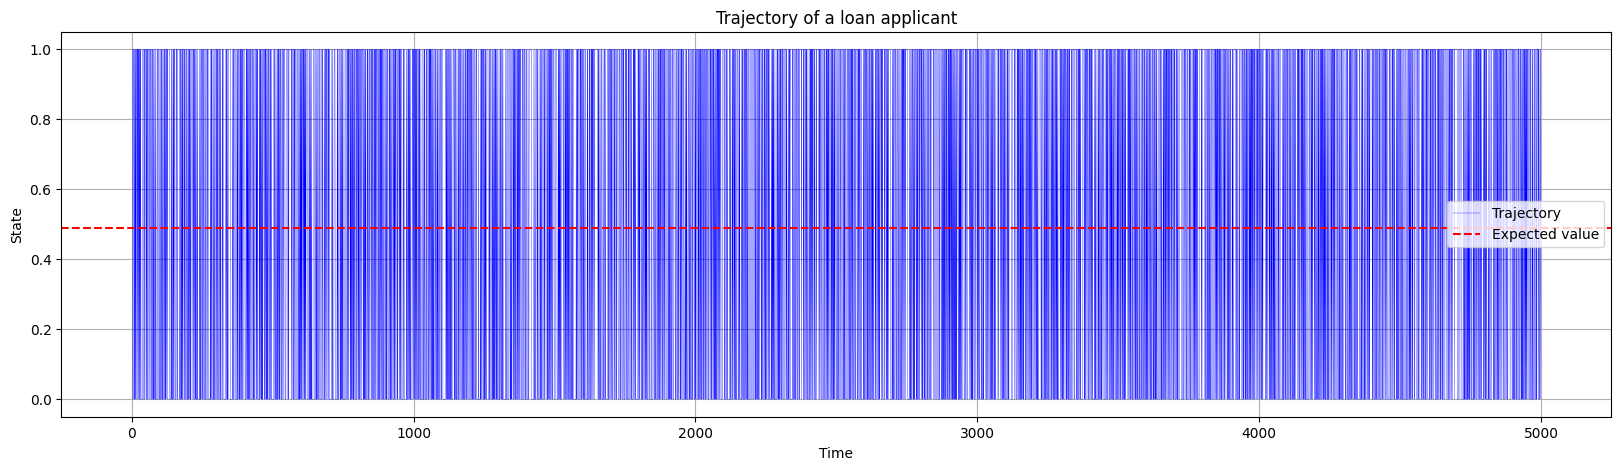

In [12]:
A = 0
B = 1
initial_probability = 0.5
k = 5000
alpha = beta = 0.5

trajectory = np.random.choice(2, size=k, p=[0.5, 0.5])

for i in range(k - 1):
    if trajectory[i] == 0:
        trajectory[i + 1] = np.random.choice(2, p=[1 - alpha, alpha])
    else:
        trajectory[i + 1] = np.random.choice(2, p=[1 - beta, beta])

# compute expected value
expected_value = np.sum(trajectory[:1001]) / 1000
print(f"Expected value: {expected_value}")

# plot the above
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(trajectory, label="Trajectory", color="blue", linewidth=0.25)
ax.set_xlabel("Time")
ax.set_ylabel("State")
ax.set_title("Trajectory of a loan applicant")
ax.legend()
ax.grid(True)

# and plot the expected value
ax.axhline(expected_value, color="red", linestyle="--", label="Expected value")
ax.legend()

plt.show()


The above result is predictable, because with 
$\alpha = \beta = 0.5$, the transition matrix becomes

$$
P = \begin{pmatrix}
0.5 & 0.5 \\
0.5 & 0.5
\end{pmatrix}
$$

Since the rows are identicial, effectively all our variables,
like $P(E_k = B | E_k = A)$ is equal to all the other state 
changes, implying that they are IID. 

#### Question 5

$\pi_k$ represents the probability distribution vector of
the state of the financial agent at time $k$

#### Question 6

In [37]:
beta = 2 / 3
alpha = 1 / 4

In [ ]:
np.random.seed(242)

initial_probability = [0.5, 0.5]
k = 500
trajectory_count = 100

trajectories = []

for i in range(trajectory_count):
    trajectory = np.random.choice(2, size=k + 1, p=initial_probability)

    for t in range(k):
        if trajectory[t] == 0:  # State A
            trajectory[t + 1] = np.random.choice(2, p=[1 - alpha, alpha])
        else:  # State B
            trajectory[t + 1] = np.random.choice(2, p=[1 - beta, beta])

    trajectories.append(trajectory)

# Calculate proportion of B (1s) at the final step
prob_B = np.mean([item[-1] for item in trajectories])
prob_A = 1 - prob_B

pi_500_approx = np.array([prob_A, prob_B])
print(f"Approximated pi_500: {pi_500_approx}")


Approximated pi_500: [0.63 0.37]


The value of `pi_500` can be approximated by taking the average
across all the simulation runs. I obtained `[0.63 0.37]`. Despite
the randomness in the individual trajectories, it appears to be 
convering to a specific value. We can actually visualize this,
by plotting the specific trajectories, and then the average 
trajectory as well 

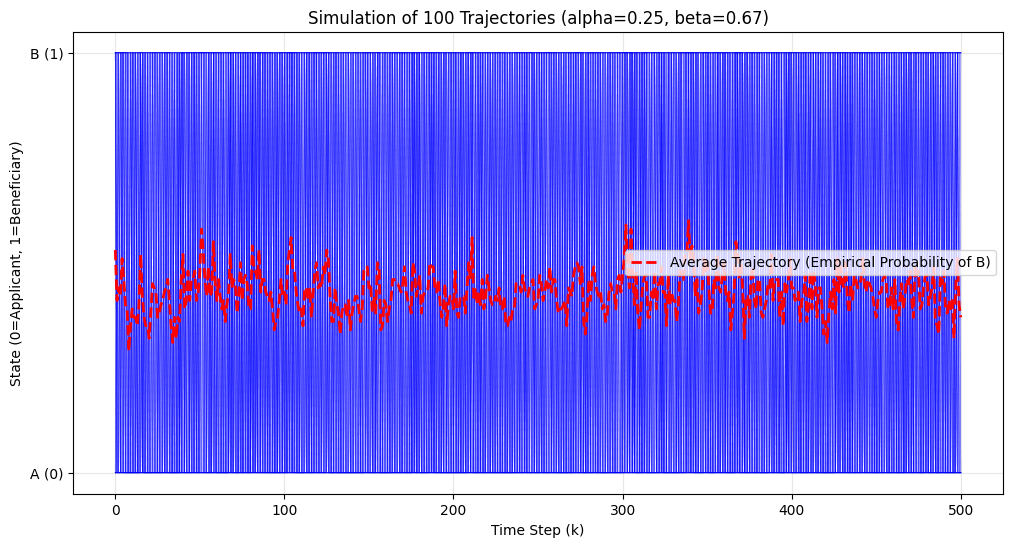

In [29]:
fig, ax = plt.subplots(figsize=(12, 6))

# Plot all 100 trajectories with high transparency for better
# visibility
for traj in trajectories:
    ax.plot(traj, color="blue", alpha=0.1, linewidth=0.5)

# Plot the average trajectory to show the trend clearly
mean_trajectory = np.mean(trajectories, axis=0)
ax.plot(
    mean_trajectory,
    color="red",
    linewidth=2,
    linestyle="--",
    label="Average Trajectory (Empirical Probability of B)",
)

ax.set_title(f"Simulation of 100 Trajectories (alpha={alpha:.2f}, beta={beta:.2f})")
ax.set_xlabel("Time Step (k)")
ax.set_ylabel("State (0=Applicant, 1=Beneficiary)")
ax.set_yticks([0, 1])
ax.set_yticklabels(["A (0)", "B (1)"])
ax.legend(loc="right")
ax.grid(True, alpha=0.3)

plt.show()

#### Question 7

In [ ]:
def financial_agent(
    alpha: float,
    beta: float,
    initial_probability: np.ndarray,
    trajectory_length: int,
    trajectory_count: int,
    seed: int = 242,
):
    """
    Simulation function for the financial agent problem

    Parameters:
      - alpha: float representing probability of obtaining a loan
      - beta: float representing probability of repayment
      - initial_probability: NDArray representing the probability
        of starting out either as a applicant or beneficiary
      - trajectory_length: int representing the number of runs
        within each simulation
      - trajectory_count: int representing the number of
        simulations to run
      - seed: Random seed for reproducibility

    Returns:
      - trajectories: An NDArray containing all the simulations.
        It will have trajectory_length * trajectory_count total
        elements
    """
    np.random.seed(seed)

    # guard: ensure initial probabilities sum to 1 (approx)
    assert round(sum(initial_probability), 6) == 1, (
        f"{initial_probability} doesn't sum to 1"
    )

    trajectories = []

    for _ in range(trajectory_count):
        trajectory = np.random.choice(
            2, size=trajectory_length + 1, p=initial_probability
        )

        for t in range(trajectory_length):
            if trajectory[t] == 0:  # State A
                trajectory[t + 1] = np.random.choice(2, p=[1 - alpha, alpha])
            else:  # State B
                trajectory[t + 1] = np.random.choice(2, p=[1 - beta, beta])

        trajectories.append(trajectory)

    return trajectories


trajectories = financial_agent(
    alpha=1 / 4,
    beta=2 / 3,
    initial_probability=[0.5, 0.5],
    trajectory_length=500,
    trajectory_count=100,
    seed=242,
)

try:
    financial_agent(
        alpha=1 / 4,
        beta=2 / 3,
        initial_probability=[0.65, 0.5],
        trajectory_length=500,
        trajectory_count=100,
        seed=242,
    )
except AssertionError as e:
    print(f"We successfully caught the assertion error: {e}")

We successfully caught the assertion error: [0.65, 0.5] doesn't sum to 1


Ok, with the above defined, let's run an experiment that across a
range of inputted initial probabilities, the system will 
eventually converge to the same values after enough time. We'll
do this by running the `financial_agent` simulation across a range
of initial probabilities, and computing the final value for each
one, and then plotting the starting probability of the starting
and ending probability for b, for example. 

Note that since this is a Markov Chain, we can actually calculate 
the theoretical stationary distribution value, to see if it lines
up with our expectation. 

In [ ]:
def get_theoretical_stationary_distribution(alpha: float, beta: float):
    """
    Calculates the theoretical stationary distribution
    pi = [pi_A, pi_B] for the transition matrix:
        P = | 1-alpha   alpha |
            | 1-beta    beta  |

    Formula derivation:
    pi_B = alpha / (1 - beta + alpha)
    pi_A = 1 - pi_B
    """
    pi_B = alpha / (1 - beta + alpha)
    pi_A = 1 - pi_B

    return np.array([pi_A, pi_B])


# Validation
theoretical_pi = get_theoretical_stationary_distribution(alpha=alpha, beta=beta)
print(f"Theoretical Stationary Distribution [A, B]: {theoretical_pi}")
print(f"Decimal Check for B: {theoretical_pi[1]}")


Theoretical Stationary Distribution [A, B]: [0.57142857 0.42857143]
Decimal Check for B: 0.42857142857142855


Running simulations for different initial probabilities...


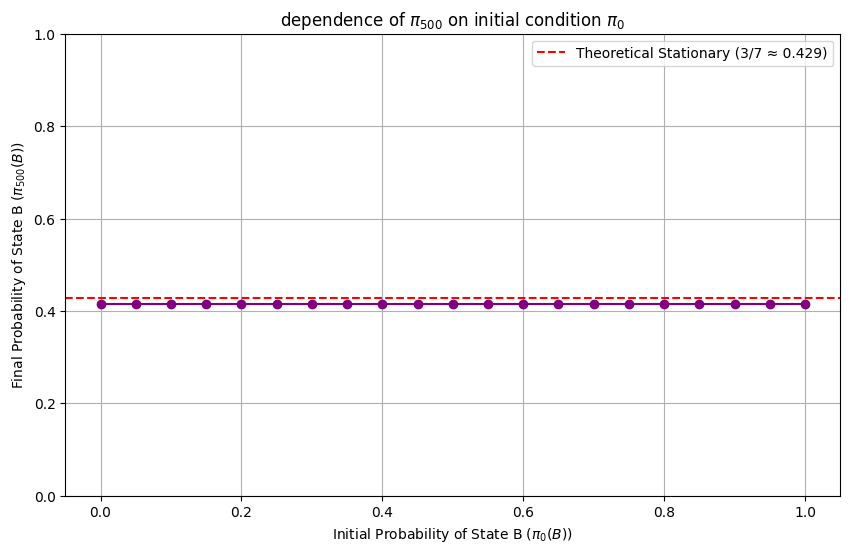

In [38]:
# Range of initial probabilities for state B (0 to 1)
start_probs_B = np.linspace(0, 1, 21)  # 0, 0.05, 0.10, ... 1
end_probs_B = []

print("Running simulations for different initial probabilities...")

for p_start in start_probs_B:
    init_prob = [1 - p_start, p_start]

    # Run your function
    trajs = financial_agent(
        alpha=alpha,
        beta=beta,
        initial_probability=init_prob,
        trajectory_length=500,
        trajectory_count=200,  # Increased slightly for smoother averages
        seed=242,
    )

    # Calculate pi_500 for State B (fraction of trajectories ending in 1)
    final_states = [t[-1] for t in trajs]
    pi_500_B = np.mean(final_states)
    end_probs_B.append(pi_500_B)

# --- Plotting the Observation ---
plt.figure(figsize=(10, 6))
plt.plot(start_probs_B, end_probs_B, marker="o", linestyle="-", color="purple")

# Theoretical stationary value calculation
theoretical_pi_B = theoretical_pi[1]
plt.axhline(
    y=theoretical_pi_B,
    color="r",
    linestyle="--",
    label=f"Theoretical Stationary (3/7 ≈ {theoretical_pi_B:.3f})",
)

plt.title(r"dependence of $\pi_{500}$ on initial condition $\pi_0$")
plt.xlabel(r"Initial Probability of State B ($\pi_0(B)$)")
plt.ylabel(r"Final Probability of State B ($\pi_{500}(B)$)")
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()


The graph shows that $\pi_{500}$ is approximately independent of the initial distribution $\pi_0$. Whether you start with $100\%$ applicants or $100\%$ beneficiaries, the system converges to the same steady-state value (approx $0.43$) after 500 steps. This demonstrates the ergodicity of the Markov chain: for long times $k$, the chain "forgets" its initial condition and converges to a unique stationary distribution.

#### Question 8

Show that $\pi_k = \pi_0 P^k$.

#### Proof by Induction

**Base Case:** 
By the definition of the transition matrix and the law of total probability:$
$$
\pi_1 = \pi_0 P
$$
This holds true by definition.

**Inductive Hypothesis:**
Assume that for some integer $n \ge 1$, the relation holds:
$$
\pi_n = \pi_0 P^n
$$

**Inductive Step:**
We examine the distribution at time $n+1$. By the definition of the Markov chain evolution:$
$$
\pi_{n+1} = \pi_n P
$$

Substitute the inductive hypothesis ($\pi_n = \pi_0 P^n$) into 
this equation:
$$
\pi_{n+1} = (\pi_0 P^n) P
$$

By the associativity of matrix multiplication:
$$
\pi_{n+1} = \pi_0 (P^n P) = \pi_0 P^{n+1}
$$

#### Conclusion

By the principle of mathematical induction, the formula $\pi_k = \pi_0 P^k$ holds for all integers $k \ge 1$.

#### Question 9

This question is just asking us to compute the stationary 
distribution. Here's the system of equation that we obtain:

Let $\pi_{*} = (x, y)$ where $x$ corresponds to state A and $y$ 
to state B.

The condition $\pi_{*} = \pi_{*} P$ yields the system:
$$
\begin{cases}
x = x(1-\alpha) + y(1-\beta) \\
y = x\alpha + y\beta
\end{cases}
$$

Additionally, we have the normalization constraint:
$$
x + y = 1 \implies x = 1 - y
$$

Substitute $x = 1 - y$ into the second equation of the system:
$$
y = (1-y)\alpha + y\beta
$$

$$
y = \alpha - y\alpha + y\beta
$$

$$
y(1 - \beta + \alpha) = \alpha
$$

$$
y = \frac{\alpha}{1 - \beta + \alpha}
$$

Now, find $x$:
$$
x = 1 - \frac{\alpha}{1 - \beta + \alpha} = \frac{1 - \beta + \alpha - \alpha}{1 - \beta + \alpha} = \frac{1 - \beta}{1 - \beta + \alpha}
$$

Thus, the stationary distribution is:
$$
\pi_{*} = \left( \frac{1-\beta}{1-\beta+\alpha}, \quad \frac{\alpha}{1-\beta+\alpha} \right)
$$

#### Question 10

This system will always converge, except in two conditions:

**1. $\beta - \alpha = 1$:**

In this case, the system of equations won't have a solution. 
Generally, this implies that $\beta = 1$ and $\alpha = 0$, or
the transition matrix is equal to the identity matrix. So, if you
start in A, you stay in A. If you start in B, you stay in B.

Here, there is no convergence to a universal distribution, since 
history is never forgotten.

**2. $\beta - \alpha = -1$:**

This simplies that $\beta = 0$ and $\alpha = 1$. So, the system
will flip between A -> B -> A -> B -> ... forever. In this case,
the stationary distribution is (0.5, 0.5), but this system itself
won't converge to it, since it will keep deterministically 
jumping.

For $y_k$ to converge to $y_*$ as $k \to \infty$, we require the term $(\beta - \alpha)^k$ to vanish. This happens if and only if:

$$
|\beta - \alpha| < 1
$$

1. If $\beta - \alpha = 1$ then there is no convergence to a 
   unique stationary distribution independent of the initial 
   state
2. If $\beta - \alpha = -1$ then the system is deterministically
   oscillating and the convergence doesn't exist.

#### Question 11

This question is essentially asking how quick the convergence 
to a stationary distributions happens – the error between the 
current probaility at state $k$ and the stationary distribution
gets cut down by some fixed percentage.

From the result of Question 10, we established the recurrence 
relation for the probability of being in state B (denoted as 
index 2 or $y$):

$$
\mathbb{P}(E_k = B) - \pi_*^B = (\beta - \alpha)^k (\mathbb{P}(E_0 = B) - \pi_*^B)
$$

Taking the absolute value of both sides:
$$
|\mathbb{P}(E_k = B) - \pi_*^B| = |\beta - \alpha|^k \cdot |\mathbb{P}(E_0 = B) - \pi_*^B|
$$

We define the constants:
$$
\begin{align}
    & \text{Let $\eta = |\beta - \alpha|$.} \\
    & \text{From Question 10, we require $|\beta - \alpha| < 1$ for convergence}. \\
    & \text{Thus, $\eta \in [0, 1)$.} \\
    & \text{Let $C = 1$.} \\
    & \text{Since probabilities are bounded in $[0, 1]$, their max difference is $\le 1$.} \\ 
    & \text{Therefore, $|\mathbb{P}(E_0 = B) - \pi_*^B| \le 1$.}
\end{align}
$$

Substituting these into the equation:
$$
|\mathbb{P}(E_k = B) - \pi_*^B| \le 1 \cdot \eta^k = C \eta^k
$$

For state A (index 1), recall that $\mathbb{P}(E_k = A) = 1 - \mathbb{P}(E_k = B)$ and $\pi_*^A = 1 - \pi_*^B$.

$$
|\mathbb{P}(E_k = A) - \pi_*^A| = |(1 - \mathbb{P}(E_k = B)) - (1 - \pi_*^B)| = |-\mathbb{P}(E_k = B) + \pi_*^B|
$$

$$
= |\mathbb{P}(E_k = B) - \pi_*^B| \le C \eta^k
$$

**Deduction:**

We deduce that the random variable $E_k$ converges in law (distribution) to the stationary distribution $\pi_*$ at a **geometric rate** (exponential speed). The speed of this convergence is determined by the _spectral gap_ $1 - \eta = 1 - |\beta - \alpha|$, where the spectral gap is just a fancy term 
that basically implies that the smaller the difference between
$\alpha, \beta$, the faster the simulation stabilizes.

#### Question 12

Let $p_1 = \mathbb{P}(E_1 = B)$.

Based on the law of total probability, $p_1$ is determined by the 
initial state $p_0$ and the transition probabilities:

$$
p_1 = \mathbb{P}(E_1 = B | E_0 = A)\mathbb{P}(E_0 = A) + \mathbb{P}(E_1 = B | E_0 = B)\mathbb{P}(E_0 = B)
$$

$$
p_1 = \alpha(1 - p_0) + \beta p_0
$$

There is an empirical proportion $\hat{p}_1 = 0.60$ over $n=500$ trials. The 95\% confidence interval for the true proportion $p_1$
is given by the Wald interval approximation:

$$
CI_{p_1} = \left[ \hat{p}_1 - z_{0.975}\sqrt{\frac{\hat{p}_1(1-\hat{p}_1)}{n}}, \quad \hat{p}_1 + z_{0.975}\sqrt{\frac{\hat{p}_1(1-\hat{p}_1)}{n}} \right]
$$

Using $z_{0.975} \approx 1.96$:

$$
SE = \sqrt{\frac{0.6(0.4)}{500}} = \sqrt{\frac{0.24}{500}} \approx 0.0219
$$

$$
CI_{p_1} = [0.6 - 1.96(0.0219), 0.6 + 1.96(0.0219)] \approx [0.557, 0.643]
$$

So, to find the confidence interval for $\alpha$, we rearrange the probability equation:

$$
\alpha(1 - p_0) = p_1 - \beta p_0 \implies \alpha = \frac{p_1 - \beta p_0}{1 - p_0}
$$

Per question 10, we can assume $p_0 \ne 1$, otherwise $\alpha$ is
unobservable.

We substitute the lower and upper bounds of $p_1$ into this 
expression to obtain the 95\% confidence interval for $\alpha$:

$$
CI_{\alpha} = \left[ \frac{0.557 - \beta p_0}{1 - p_0}, \quad \frac{0.643 - \beta p_0}{1 - p_0} \right]
$$

### 1.2 Extension with Fixed Exclusion Period

#### Changes to Model

- $\alpha$ represents the probability of repayment (was 
previously $\beta$) 
- $\beta$ is now the probability of getting approved for a loan
- If the agent defaults ($p = 1-\alpha$), then they are excluded
from applying for the next $N$ years

First, let's figure out the state spaces:

- $x_1 = B$ (Beneficiary)
- $x_2 = A^1$ (Applicant / 1 year left of exclusion)
- $x_i = A^{i-1}$ (Excluded with $i-1$ years remaining)
- $x_{N+1} = A^N$ (Newly excluded / N years remaining)

Note that the last two bullets are very similar - the last bullet
is effectively a special ase of the 3rd bullet, where i = N. 

Now, for each state space concept, we want to define what the 
transition rules would be. At a high level, beneficiary's either
repay and become a beneficiary again, or default and enter the
exclusionary period. Applicants either succeed and become 
beneficiaries, or enters the exclusionary period. And finally, 
if someone is inside the exclusionary period, they **definitely**
stay in there, except with one less year that they are 
ineligible. 

**Transitions from State B ($x_1$):**
1. $P_{1,1} = \alpha$: The agent repays successfully and the loan is renewed
2. $P_{1,N+1} = 1 - \alpha$: The agent defaults and enters the exclusion state $A^N$ 
3. All other $P_{1,j} = 0$

**Transitions from State $A^1$ ($x_2$):**
1. $P_{2,1} = \beta$: The agent applies and obtains the loan.
2. $P_{2, N+1} = 1 - \beta$: The agent is refused and enters exclusion state $A^N$ (resetting the clock)
3. $P_{2,2} = 0$: You cannot stay in $A^1$; you either succeed or get excluded for $N$ years.

**Transitions from States $A^i$ where $i > 1$:**
($x_3$ to $x_{N+1}$):** These states represent the "countdown" of
the exclusion period. The agent simply moves one year closer to
being eligible.

1. $P_{i, i-1} = 1$: An agent with $i-1$ years remaining ($x_i$)
moves to having $i-2$ years remaining ($x_{i-1}$) with certainty.
  * For example, $P_{3,2} = 1$ (moving from $A^2 \to A^1$).
  * $P_{N+1, N} = 1$ (moving from $A^N \to A^{N-1}$).

The matrix form of P would be:

$$
\begin{bmatrix}
\alpha & 0 & 0 & ... & 0 & 1-\alpha \\
\beta & 0 & 0 & ... & 0 & 1-\beta \\
0 & 1 & 0 & ... & 0 & 0 \\
0 & 0 & 1 & ... & 0 & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & 0 & ... & 1 & 0 \\
\end{bmatrix}
$$

To verify that $P$ is a valid transition matrix, it must verify
two properties:

1. **Non-negativity:** which we observe, since all entries are
probabilities of transitioning between the states
2. **Stochasticity:** which is that all rows must sum to 1. We do
observe this in the matrix. Row 1 is $1 - \alpha + \alpha$, which
is the same for row 2 except using $\beta$. All other rows have 
only one cell with a value of 1

So, $P$ is a valid stochastic transition matrix. 


#### Question 14

Intuitively: there's a structure in the transition matrix, where
you can only enter the "punishment" states – that is, the ones 
where you cannot apply for a loan, from the previous state. 

So, from the applicant or beneficiary states, you can enter $A^N$,
representing that you are excluded for N periods. From $A^N$, you
can only enter $A^{N-1}$. This is the **only way** to enter this
state. The same is true for $A^{N-2}, A^{N-3}$, ... and so on.

So, let $\pi_* = (\pi_B, \pi_{A^1}, \pi_{A^2}, \dots, \pi_{A^N})$.

From the structure of matrix $P$ derived in Question 13, 
the balance equations are:

1. For state $B$ (Column 1):
$$ 
\begin{align*}
    & \pi_B = \pi_B \alpha + \pi_{A^1} \beta \\
    \implies & \pi_B (1 - \alpha) = \pi_{A^1} \beta \\
    \implies & \pi_B = \pi_{A^1} \frac{\beta}{1-\alpha}
\end{align*}
$$

2. For the exclusion states $A^k$ ($k \in \{1, \dots, N-1\}$):
As stated above, and from the structure of the lower block of the
transition matrix $P$, we have a deterministic flow 
$A^{k+1} \to A^k$:
$$ \pi_{A^k} = \pi_{A^{k+1}} $$

By induction, all states in the exclusion/applicant chain have 
equal probability:
$$ \pi_{A^1} = \pi_{A^2} = \dots = \pi_{A^N} = x $$

3. Normalization Constraint:

The sum of all probabilities must be 1:
$$ \pi_B + \sum_{k=1}^{N} \pi_{A^k} = 1 $$

So, we can solve this in two variables:

$$ \pi_B + N x = 1 $$

Now, substitute the expression for $\pi_B$ from step 1 into the normalization equation:
$$ x \frac{\beta}{1-\alpha} + N x = 1 $$

Factor out $x$:
$$ x \left( \frac{\beta}{1-\alpha} + N \right) = 1 $$
$$ x \left( \frac{\beta + N(1-\alpha)}{1-\alpha} \right) = 1 $$
$$ x = \frac{1-\alpha}{\beta + N(1-\alpha)} $$

Finally, solve for $\pi_B$:

$$ \pi_B = x \frac{\beta}{1-\alpha} = \left( \frac{1-\alpha}{\beta + N(1-\alpha)} \right) \frac{\beta}{1-\alpha} = \frac{\beta}{\beta + N(1-\alpha)} $$


The stationary distribution $\pi_*$ is given by:
$$
\pi_* = \left( \underbrace{\frac{\beta}{\beta + N(1-\alpha)}}_{\text{State B}}, \quad \underbrace{\frac{1-\alpha}{\beta + N(1-\alpha)}}_{\text{State } A^1}, \quad \dots, \quad \underbrace{\frac{1-\alpha}{\beta + N(1-\alpha)}}_{\text{State } A^N} \right)
$$

#### Question 15

Let $\pi_k = (y_k, x_k^1, x_k^2, \dots, x_k^N)$, where 
$y_k = \mathbb{P}(E_k = B)$ and $x_k^j = \mathbb{P}(E_k = A^j)$.

Using the relation $\pi_{k+1} = \pi_k P$, we obtain the following
system:

1. For the Beneficiary State ($B$):
$$
y_{k+1} = \alpha y_k + \beta x_k^1
$$

2. For the Exclusion Entry State ($A^N$):
This state receives flows from defaults and refusals:
$$
x_{k+1}^N = (1-\alpha)y_k + (1-\beta)x_k^1
$$

3. For the Intermediate Exclusion States ($A^j$ where $j < N$):
These states simply shift mass from the higher index:
$$
x_{k+1}^j = x_k^{j+1} \quad \text{for } j = 1, \dots, N-1
$$

Combining (1) and (3) allows us to see the delay effect. 
Since $x_k^1 = x_{k-1}^2 = \dots = x_{k-N+1}^N$, the probability 
of being an active applicant at time $k$ depends on the influx 
into the exclusion zone $N$ steps ago.

Since $(E_k)_{k \ge 1}$ is a Markov chain on the finite state 
space $\{B, A^1, \dots, A^N\}$ with transition matrix $P$, the 
probability distribution at step $k+1$ is obtained by multiplying
the distribution at step $k$ by the transition matrix:

$$
\pi_{k+1} = \pi_k P
$$

If we apply the relation recursively:
$$
\begin{align*}
    \pi_1 &= \pi_0 P \\
    \pi_2 &= \pi_1 P = (\pi_0 P) P = \pi_0 P^2 \\
    &\vdots \\
    \pi_k &= \pi_0 P^k
\end{align*}
$$

Thus, the probability distribution at time $k$ is given by:
$$
\pi_k = \pi_0 P^k
$$

#### Question 16

In [ ]:
def financial_agent_fixed_exclusion(
    N: int, alpha: float, beta: float, pi_0: np.ndarray, n_steps: int
):
    """
    Simulates the evolution of the distribution pi_k for the fixed
    exclusion model.

    Returns:
        pi_history_B: A list containing the probability of being in State B
                      at each time step k=0 to n_steps.
        final_distribution: The full vector pi_n_steps.
    """
    # Construct the Transition Matrix P (Size N+1)
    size = N + 1
    P = np.zeros((size, size))

    # Row 0 (State B): Renew (-> B) or Default (-> A^N)
    # A^N is at index N
    P[0, 0] = alpha
    P[0, N] = 1 - alpha

    # Row 1 (State A^1): Obtain Loan (-> B) or Refusal (-> A^N)
    P[1, 0] = beta
    P[1, N] = 1 - beta

    # Rows 2 to N (States A^2 to A^N): Deterministic countdown (A^k -> A^{k-1})
    # Logic: Row r (State A^{r-1}) goes to Column r-1 (State A^{r-2})
    for r in range(2, size):
        P[r, r - 1] = 1.0

    # Iterate to build history
    pi_current = pi_0.copy()
    pi_history_B = [pi_current[0]]  # Store prob of state B (index 0)

    for _ in range(n_steps):
        pi_current = pi_current @ P
        pi_history_B.append(pi_current[0])

    return pi_history_B, pi_current

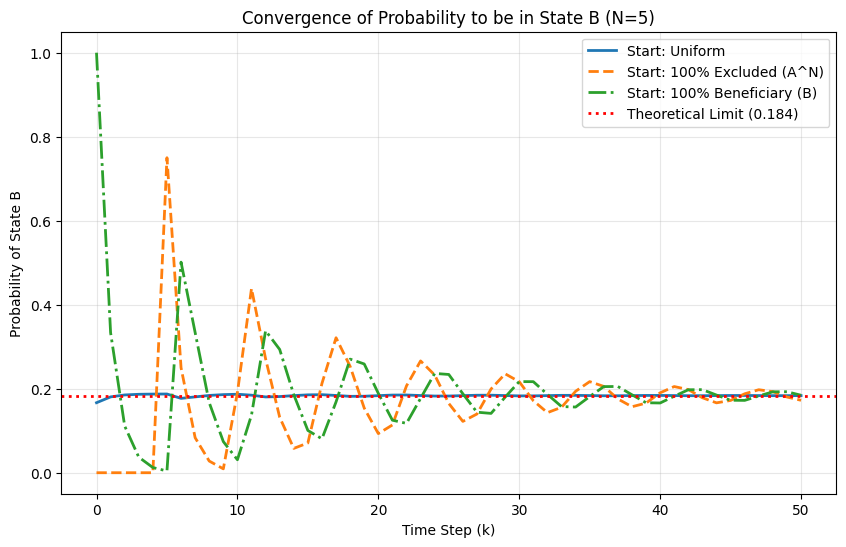

Final Uniform: 0.1837
Final Excluded: 0.1724
Theoretical: 0.1837


In [5]:
n = 5
alpha = 1 / 3
beta = 3 / 4
steps = 50

# let's run three cases: uniform, A^N, and B

# Case 1: Uniform Start (1/(N+1) everywhere)
pi_0_uniform = np.ones(n + 1) / (n + 1)

# Case 2: Worst Case Start (100% in A^N - newly excluded)
pi_0_excluded = np.zeros(n + 1)
pi_0_excluded[n] = 1.0

# Case 3: Best Case Start (100% in B - beneficiary)
pi_0_beneficiary = np.zeros(n + 1)
pi_0_beneficiary[0] = 1.0

# Run Simulations
hist_uniform, final_uniform = financial_agent_fixed_exclusion(
    N=n,
    alpha=alpha,
    beta=beta,
    pi_0=pi_0_uniform,
    n_steps=steps,
)

hist_excluded, final_excluded = financial_agent_fixed_exclusion(
    N=n,
    alpha=alpha,
    beta=beta,
    pi_0=pi_0_excluded,
    n_steps=steps,
)

hist_beneficiary, final_beneficiary = financial_agent_fixed_exclusion(
    N=n,
    alpha=alpha,
    beta=beta,
    pi_0=pi_0_beneficiary,
    n_steps=steps,
)

# Theoretical Value (for validation)
# pi_B = beta / (beta + N(1-alpha))
denom = beta + n * (1 - alpha)
theo_pi_B = beta / denom

# Plot
plt.figure(figsize=(10, 6))

plt.plot(hist_uniform, label="Start: Uniform", linestyle="-", linewidth=2)
plt.plot(hist_excluded, label="Start: 100% Excluded (A^N)", linestyle="--", linewidth=2)
plt.plot(
    hist_beneficiary, label="Start: 100% Beneficiary (B)", linestyle="-.", linewidth=2
)

plt.axhline(
    y=theo_pi_B,
    color="red",
    linestyle=":",
    linewidth=2,
    label=f"Theoretical Limit ({theo_pi_B:.3f})",
)

plt.title(f"Convergence of Probability to be in State B (N={n})")
plt.xlabel("Time Step (k)")
plt.ylabel("Probability of State B")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Print numerical check
print(f"Final Uniform: {final_uniform[0]:.4f}")
print(f"Final Excluded: {final_excluded[0]:.4f}")
print(f"Theoretical: {theo_pi_B:.4f}")


Two observations:

1. Convergence to the Theoretical Limit (Referencing Q14)

You can see that the numerically computed distribution 
$\pi_{1000}$ matches the theoretical stationary distribution 
$\pi_*$ derived in Question 14. 

**Theoretical Calculation:** With $N=5, \alpha=1/3, \beta=3/4$, 
we calculated $\pi_*^B \approx 0.1837$.

**Numerical Result:** The simulation yields 
$\pi_{1000}(B) \approx 0.1837$, confirming our theoretical 
derivation of the stationary vector

2. Independence from Initial Conditions (Referencing Q15)

The final distribution is identical regardless of the starting 
state $\pi_0$.  In my case, I identified three starting variables:
Uniform, 100% Beneficiary, or 100% Excluded. This validates the 
property shown in Question 15: $\pi_k = \pi_0 P^k$. As 
$k \to \infty$, the matrix $P^k$ converges to a matrix where 
every row is the stationary distribution $\pi_*$. Consequently, 
the term $\pi_0$ "cancels out," demonstrating the ergodicity of 
the Markov chain. The system eventually "forgets" its history 
(exclusion or beneficiary status) and settles into the 
steady-state probability.

## Question 2: Ruin Theory